<a href="https://colab.research.google.com/github/meghanair02/Seven7code-Tech/blob/main/TASK_1_Titanic_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
titanic_df = pd.read_csv('train.csv')
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


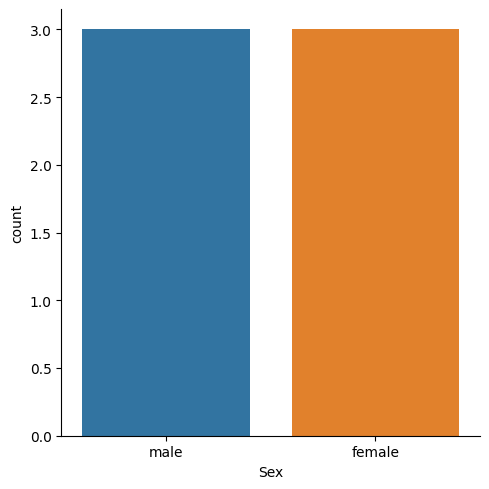

In [ ]:
data = {
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female'],
}
titanic_df = pd.DataFrame(data)
sns.catplot(x='Sex', data=titanic_df, kind="count")
plt.show()


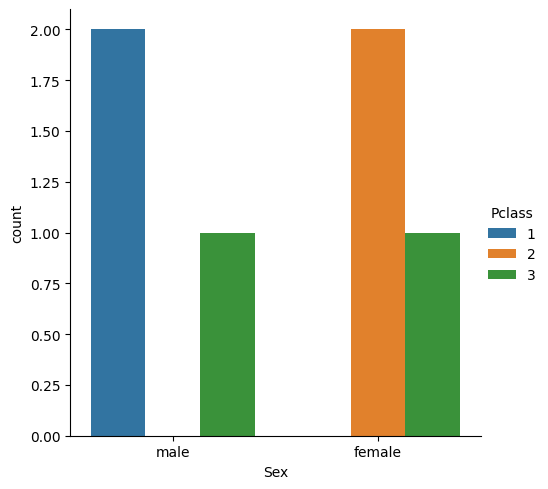

In [ ]:
data = {
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'Pclass': [1, 2, 1, 2, 3, 3],
}
titanic_df = pd.DataFrame(data)
sns.catplot(x='Sex', data=titanic_df, kind="count", hue='Pclass')
plt.show()

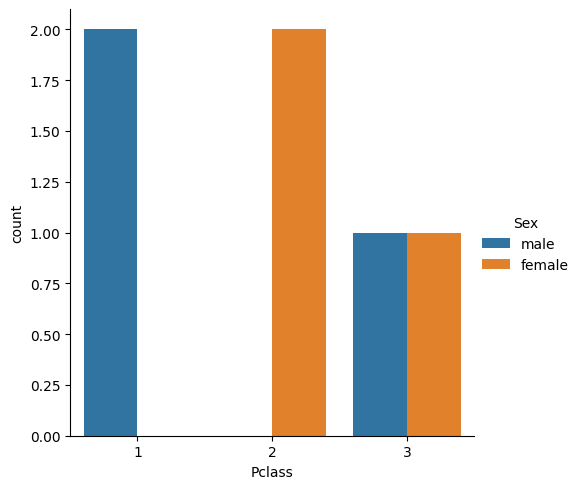

In [ ]:
data = {
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'Pclass': [1, 2, 1, 2, 3, 3],
}
titanic_df = pd.DataFrame(data)
sns.catplot(x='Pclass', data=titanic_df, kind="count", hue='Sex')
plt.show()

In [ ]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

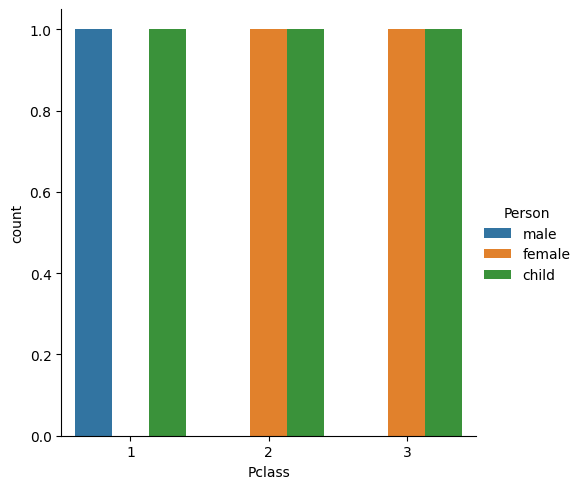

In [ ]:
data = {
    'Pclass': [1, 2, 1, 2, 3, 3],
    'Person': ['male', 'female', 'child', 'child', 'female', 'child'],
}
titanic_df = pd.DataFrame(data)
sns.catplot(x='Pclass', data=titanic_df, kind="count", hue='Person')
plt.show()

In [ ]:
titanic_df['Person'].value_counts()

child     3
female    2
male      1
Name: Person, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


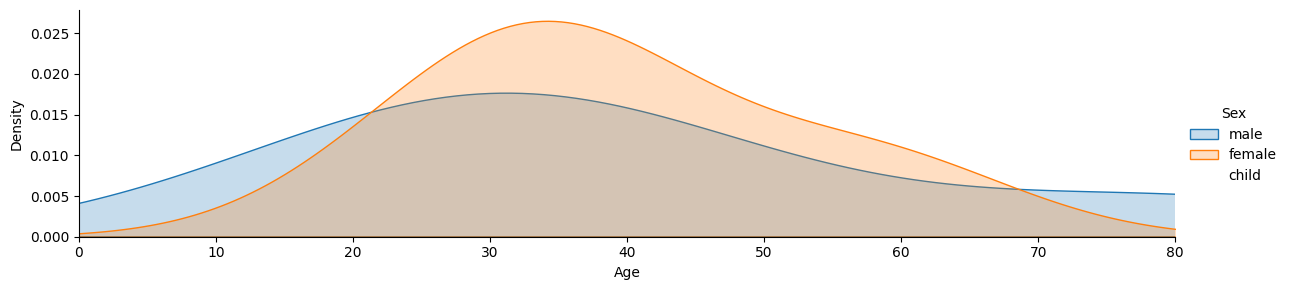

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    'Age': [22, 38, 26, 35, 35, 10, 27, 40, 58, 80],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'child', 'male', 'male', 'female', 'male'],
}
titanic_df = pd.DataFrame(data)
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


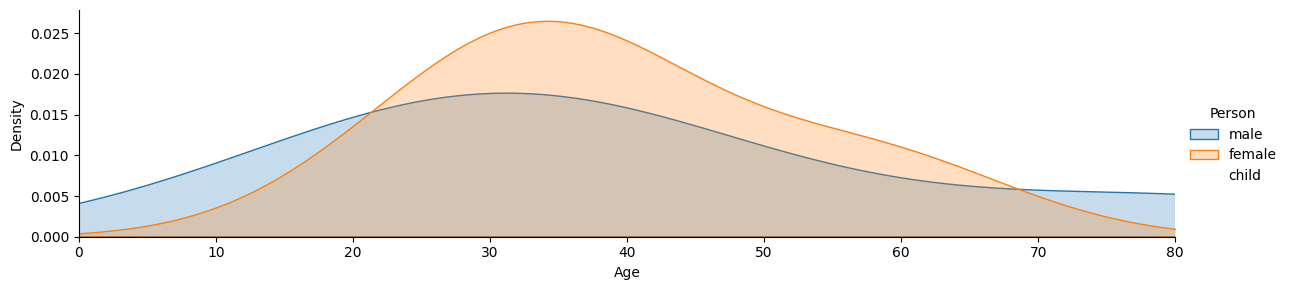

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    'Age': [22, 38, 26, 35, 35, 10, 27, 40, 58, 80],
    'Person': ['male', 'female', 'female', 'female', 'male', 'child', 'male', 'male', 'female', 'male'],

}
titanic_df = pd.DataFrame(data)

fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


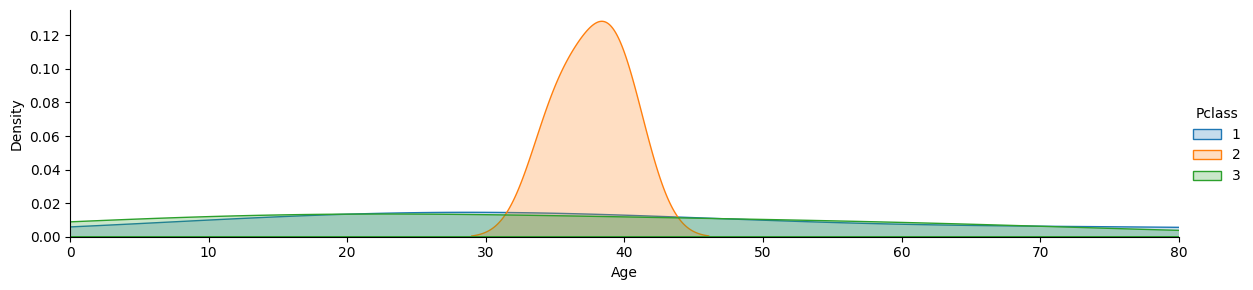

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Age': [22, 38, 26, 35, 35, 10, 27, 40, 58, 80],
    'Pclass': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
}
titanic_df = pd.DataFrame(data)

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

plt.show()


In [ ]:
titanic_df.head(10)

,Age,Pclass
0,22,1
1,38,2
2,26,3
3,35,1
4,35,2
5,10,3
6,27,1
7,40,2
8,58,3
9,80,1


In [ ]:
train_df.columns.values


array(['Survival', 'PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

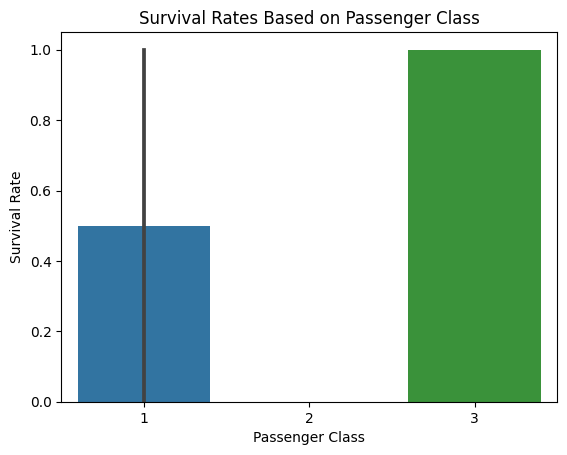

In [ ]:
data = {
    'Survived': [1, 0, 1, 0, 0],
    'Pclass': [1, 2, 3, 1, 2],
    }
train_df = pd.DataFrame(data)
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rates Based on Passenger Class')
plt.show()


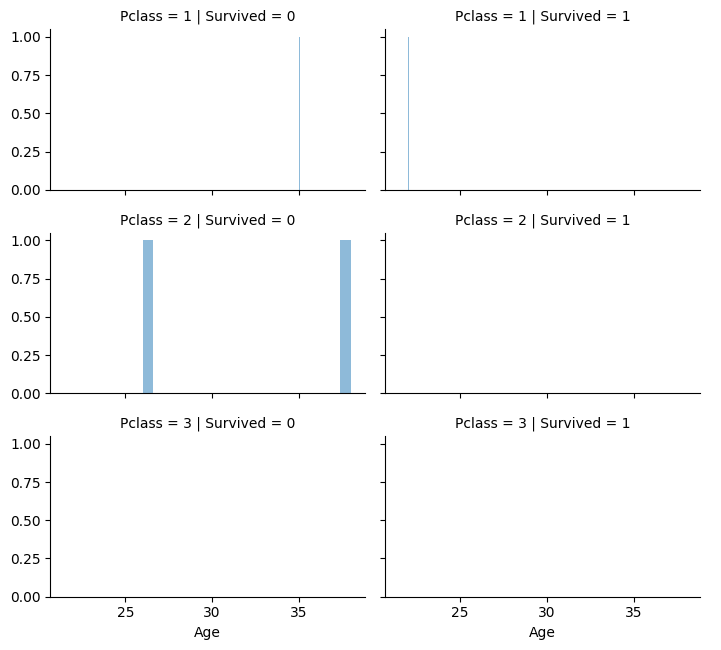

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    'Survived': [1, 0, 1, 0, 0],
    'Pclass': [1, 2, 3, 1, 2],
    'Age': [22, 38, 26, 35, 26],
}
train_df = pd.DataFrame(data)

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

plt.show()

